## Testing an Unfair Coin

In [2]:
import numpy as np
import scipy

Here you'll simulate an unfair coin with 75% chance of heads and 25% chance of tails. You'll then *flip* this coin 20 times and perform a test to determine whether you believe it to be fair or unfair.

In [3]:
n = 20 #Number of flips
p = .75 #Simulating an unfair coin
coin1 = np.random.binomial(n, p)
coin1

13

In this case, you know the theoretical mean and standard deviation of a fair coin; it can be modeled by a binomial distribution with p = 0.5. In future cases, you'll often use a t-test (as you've already previewed) in order to compare samples, but don't know the overall population statistics.

The standard deviation of a binomial distribution is given by:  

$\sigma = \sqrt{n \bullet p \bullet (1-p)}$

So you would expect that for a sample of 20 elements, the standard deviation from the expected number of heads (10) for a fair coin should be:

In [4]:
sigma = np.sqrt(n*.5*(1-.5))
sigma

2.23606797749979

And with that you can now calculate a p-value using a traditional $z$-test:

### $$ z = \frac{\bar{x}-\mu}{\sigma/1}$$

Here, $\bar{x}$ is the number of heads, $\mu$ (mu) is the expected number of heads (10), $\sigma$ (sigma) is the standard deviation (calculated above) and n is the number of observations (20).

In [5]:
z = (coin1 - 10) / (sigma / 1)
z

1.3416407864998738

Finally, you can take your $z$-score and apply standard lookup tables based on your knowledge of the normal distribution to determine the probability 

In [6]:
import scipy.stats as st

In [7]:
st.norm.sf(np.abs(z))

0.08985624743949988

This is an absolutely tiny p-value, meaning that you can reject the null hypothesis *this coin is fair* and conclude that the coin is unfair!

Here is a demonstration of how the average p-values change as the size of the sample increases.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Text(0.5, 0, 'Number of Coin Flips')

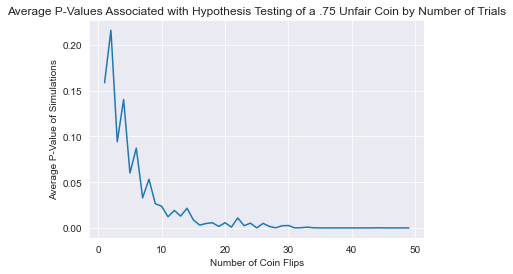

In [9]:
#How many times would you have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 # Simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')